<a href="https://colab.research.google.com/github/Andre6o6/mlcourse-2020/blob/master/LunarLander(DQL)_episodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#...Training code...

!__IMPORTANT NOTE:__ During the training I used epsilon-greedy strategy with _eps=10%_ and only remembered to decrease it to _eps=1%_ in last 500 episodes. Hence the occilation and the very clear jump at the end.

## Plot running number of successful lands

success rate = 0.998	 win rate = 0.976



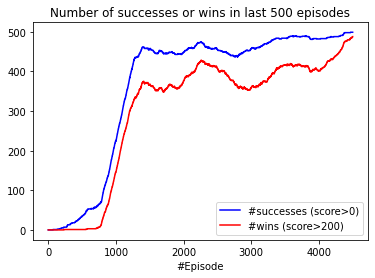

In [0]:
plt.title("Number of successes or wins in last 500 episodes")
plt.plot(running_lands, 'b')
plt.plot(running_wins, 'r')
plt.xlabel("#Episode")
plt.legend(['#successes (score>0)', '#wins (score>200)'])
print('success rate = {}\t win rate = {}\n'.format(running_lands[-1]/500, running_wins[-1]/500))

## Plot of training episodes scores

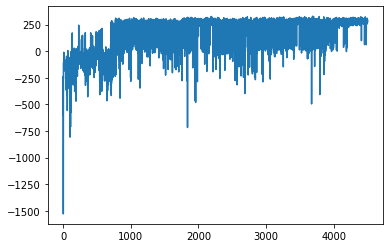

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(end_scores)

In [0]:
print("Negative scores in last 500 episodes:", len([x for x in end_scores[-500:] if x < 0]))
print("Mean score of last 500 episodes = ", np.mean(end_scores[-500:]))

Negative scores in last 500 episodes: 1
Mean score of last 500 episodes =  273.4908560369748


## Simulate 100 episodes with agent

In [0]:
import shutil
import tqdm

test_scores = []
n = 0
for ep in tqdm.trange(100):
    env = wrap_env(gym.make("LunarLander-v2"))
    state = env.reset()
    score = 0
    for i in range(1000):
        env.render()
        action = agent.predict(state)
        state, reward, done, info = env.step(action)
        score += reward
        if done:
            test_scores.append(score)
            break
    env.close()


    path = glob.glob("video/*.mp4")[0]
    shutil.copyfile(path, "test_videos/file{:03}.mp4".format(n))
    n += 1

100%|██████████| 100/100 [07:49<00:00,  4.69s/it]


In [0]:
pos = [i for i,x in enumerate(test_scores) if x > 0]
neg = [i for i,x in enumerate(test_scores) if x < 0]
pos_mean = np.mean(np.array(test_scores)[pos])
neg_mean = np.mean(np.array(test_scores)[neg])

print("Simulated 100 episodes")
print("{} successful;".format(len(pos)), "{} unsuccessful".format(len(neg)))
print("successful mean score = {};".format(pos_mean), "unsuccessful = {}".format(neg_mean))

Simulated 100 episodes
98 successful; 2 unsuccessful
successful mean score = 244.58098542738173; unsuccessful = -19.849231690309466


### Unsuccessfull examples

In [0]:
for idx in neg:
    print(idx, "score = {}".format(test_scores[idx]))
    show_video("test_videos/file{:03}.mp4".format(idx))

73 score = -29.878173191674136


77 score = -9.820290188944796


### Successfull examples

In [0]:
for idx in pos[::9]:
    print(idx, "score = {}".format(test_scores[idx]))
    show_video("test_videos/file{:03}.mp4".format(idx))

0 score = 272.35572221932955


9 score = 279.5387079225636


18 score = 261.2870509197862


27 score = 302.08597149039235


36 score = 269.55978551359124


45 score = 282.30604442485367


54 score = 288.3571645516462


63 score = 263.47910665430913


72 score = 273.08346319234727


83 score = 303.87314843369506


92 score = 289.7093160861921
